In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms
from networkx.algorithms.community import greedy_modularity_communities
import random
from igraph import Graph
import pandas as pd

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'bayanpy', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [2]:
#pip install igraph community_leading_eigenvector
#!pip install python-igraph --upgrade


In [3]:
# Créez un graphe
G = nx.karate_club_graph()
# Créer un graphe exemple avec igraph
G2 = Graph.Famous("Zachary")


----

### <p style="color:blue"> 1. Fast Greedy </p>

In [4]:
# Utilisez l'algorithme Fast Greedy pour détecter les communautés
coms_Fast_Greedy = list(greedy_modularity_communities(G))

# Affichez les communautés détectées
for i, community in enumerate(coms_Fast_Greedy):
    print(f"Communauté {i + 1}: {list(community)}")

Communauté 1: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Communauté 2: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Communauté 3: [0, 16, 19, 4, 5, 6, 10, 11]


----

### <p style="color:blue"> 2. Walktrap</p>

In [5]:
# Appliquez l'algorithme Walktrap
coms_Walktrap = algorithms.walktrap(G)
coms_Walktrap = coms_Walktrap.communities
# Affichez les communautés
for i, community in enumerate(coms_Walktrap):
    print(f"Communauté {i + 1}: {community}")

Communauté 1: [0, 1, 3, 7, 11, 12, 17, 19, 21]
Communauté 2: [14, 15, 18, 20, 22, 26, 29, 32, 33]
Communauté 3: [2, 8, 9, 13, 28, 30, 31]
Communauté 4: [4, 5, 6, 10, 16]
Communauté 5: [23, 24, 25, 27]


----

### <p style="color:blue"> 3. Spinglass</p>

In [6]:
# pip install cdlib

In [7]:
# Appliquez l'algorithme spinglass
coms_Spinglass = algorithms.spinglass(G)
coms_Spinglass = coms_Spinglass.communities
# Affichez les communautés
for i, community in enumerate(coms_Spinglass):
    print(f"Communauté {i + 1}: {community}")

Communauté 1: [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
Communauté 2: [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Communauté 3: [23, 24, 25, 27, 28, 31]
Communauté 4: [4, 5, 6, 10, 16]


----

### <p style="color:blue"> 4. Leading eigen</p>

In [8]:
# Appliquer l'algorithme Leading Eigen 
coms_Leading_eigen = G2.community_leading_eigenvector()

# Afficher les communautés détectées
for i, community in enumerate(coms_Leading_eigen):
    print(f"Communauté {i + 1}: {community}")

Communauté 1: [0, 4, 5, 6, 10, 11, 16]
Communauté 2: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Communauté 3: [1, 2, 3, 7, 12, 13, 17, 19, 21]
Communauté 4: [23, 24, 25, 27, 28, 31]


----

### <p style="color:blue">  5. Label Propagation</p>

In [13]:
# Appliquez l'algorithme Label Propagation
coms_Label_Propagation = list(nx.community.label_propagation_communities(G))

# Affichez les communautés détectées
for i, community in enumerate(coms_Label_Propagation):
    print(f"Communauté {i + 1}: {list(community)}")

Communauté 1: [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31]
Communauté 2: [32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30]
Communauté 3: [16, 5, 6]


---

### <p style="color:blue"> 6. InfoMap</p>

In [10]:
# Appliquer l'algorithme Infomap
coms_InfoMap = algorithms.infomap(G)
coms_InfoMap = coms_InfoMap.communities
# Afficher les communautés
for i, community in enumerate(coms_InfoMap):
    print(f"Communauté {i + 1}: {community}")

Communauté 1: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Communauté 2: [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
Communauté 3: [4, 5, 6, 10, 16]


----

### <p style="color:blue"> 8. Louvain</p>

In [11]:
# Appliquer l'algorithme Louvain
coms_Louvain = algorithms.louvain(G)
coms_Louvain = coms_Louvain.communities
# Afficher les communautés
for i, community in enumerate(coms_Louvain):
    print(f"Communauté {i + 1}: {community}")

Communauté 1: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Communauté 2: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Communauté 3: [23, 24, 25, 27, 28, 31]
Communauté 4: [4, 5, 6, 10, 16]


---

### <p style="color:blue"> Visialisation</p>

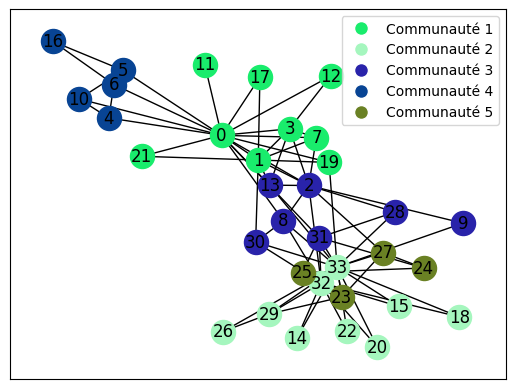

In [15]:
# coms_Fast_Greedy, coms_Walktrap, coms_Spinglass, coms_Leading_eigen
# coms_Label_Propagation, coms_InfoMap, coms_Louvain
communities = coms_Walktrap

# Afficher les communautés détectées avec des couleurs aléatoires
color_mapping = {i: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for i in range(len(communities))}

# Dessiner le graphe avec les communautés colorées
pos = nx.spring_layout(G)

for i, community in enumerate(communities):
    color = color_mapping[i]
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=color, label=f'Communauté {i + 1}')

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Ajouter une légende avec les couleurs spécifiées
legend_labels = [(f'Communauté {i + 1}', color) for i, color in color_mapping.items()]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                    for label, color in legend_labels])

plt.show()


### modularity

In [48]:
modularity = []
j=1
for i in [coms_Fast_Greedy, coms_Walktrap, coms_Spinglass,  coms_Label_Propagation, coms_InfoMap, coms_Louvain]:
    modularity.append(round(nx.community.modularity(G, i), j))
    j+=1

In [49]:
modularity

[0.4, 0.32, 0.445, 0.3095, 0.4321, 0.444904]

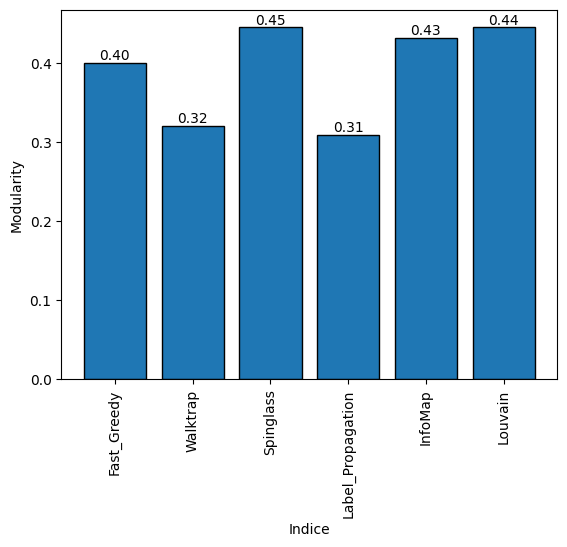

In [50]:
# Création de l'histogramme
x =['Fast_Greedy', 'Walktrap', 'Spinglass', 'Label_Propagation', 'InfoMap', 'Louvain']#'Leading_eigen',

plt.bar(x, modularity, edgecolor='black')
# Ajout de labels et du titre
plt.xlabel('Indice')
plt.ylabel('Modularity')
#plt.title('Histogramme de la Modularity')
plt.xticks(rotation='vertical')
# Ajout des valeurs de modularity sur les barres
for i, value in enumerate(modularity):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Affichage du graphique
plt.show()
